In [1]:
import numpy as np
import pandas as pd
import datetime 
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# set input variables
start_price = np.random.normal(size = 1, loc = 10.0, scale = .05) # somewhere near $10
beta = 1.2
beta_miss = 0.0007
start_date = datetime.date(1990, 1, 1)
months_pricing_data = 25 * 12
end_date = start_date + relativedelta(months=months_pricing_data)

start_headcount = 10
end_headcount = 2000

initial_stock_options = 1e7 # number of shares for founding team
founder_ownership_percent = 0.5
initial_shares_outstanding = initial_stock_options / founder_ownership_percent

In [3]:
# import market csv file
file_name = 'data/S&P500.csv'
# load csv into date frame
market = pd.read_csv(file_name, parse_dates = ['date'])
market = market.set_index(['date'], drop = False)
market = market[['date', 'Adj Close']]
# add in prior date's price and % change day over day
market['Prior Close'] = market['Adj Close'].shift(-1)
#market[, Pct.Change:=((Adj.Close - Prior.Close)/Prior.Close)];
market['Percent Change'] = ((market['Adj Close'] - market['Prior Close'])/market['Prior Close'])
market.head()

,date,Adj Close,Prior Close,Percent Change
date,,,,
2015-03-13,2015-03-13,2053.40,2065.95,-0.006075
2015-03-12,2015-03-12,2065.95,2040.24,0.012601
2015-03-11,2015-03-11,2040.24,2044.16,-0.001918
2015-03-10,2015-03-10,2044.16,2079.43,-0.016961
2015-03-09,2015-03-09,2079.43,2071.26,0.003944


In [4]:
# extract relevant date range from market data
dates = pd.date_range(start_date, end_date, freq = 'D')
stock = market.reindex(dates, fill_value=None)

In [5]:
market['p'] = market['Percent Change'] + 1
market['c'] = market['p'].cumprod()
#market.tail()
stock.head()

,date,Adj Close,Prior Close,Percent Change
1990-01-01,NaT,NaN,NaN,NaN
1990-01-02,1990-01-02,359.69,353.40,0.017799
1990-01-03,1990-01-03,358.76,359.69,-0.002586
1990-01-04,1990-01-04,355.67,358.76,-0.008613
1990-01-05,1990-01-05,352.20,355.67,-0.009756


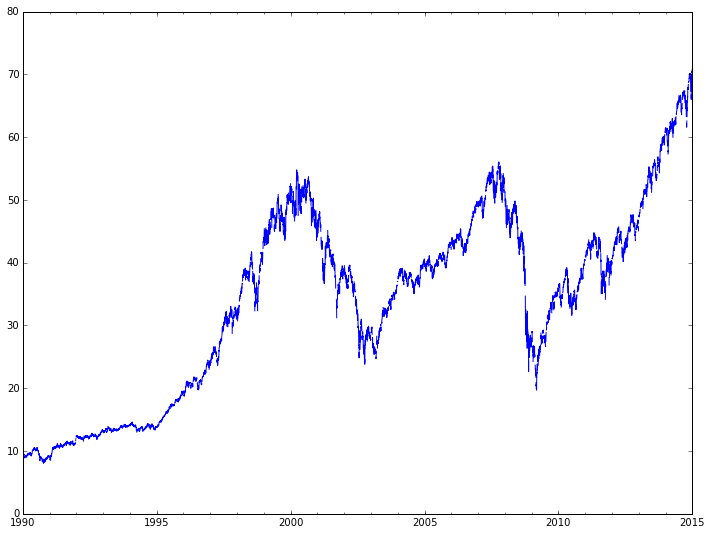

In [6]:
# use stock market price data and input Beta to back into a stock price
# multiply the market % change by the input Beta,
# using a random factor of "missing" a perfect Beta
stock['Variation'] = pd.Series(np.random.normal(size = stock['Adj Close'].size, 
                                                loc = 0, scale = beta_miss), 
                              index = stock.index)
stock['Percent Change B'] = stock['Percent Change'] * beta + stock['Variation']
stock['Percent Change B'] = stock['Percent Change B'] + 1

# add in starting stock price
stock['Price'] = np.repeat(start_price, stock['Adj Close'].size)

# calculate the cumulative product of the Beta-adjusted percent changes
stock['Percent Change Cumulative'] = stock['Percent Change B'].cumprod()
stock['Price'] = stock['Price'] * stock['Percent Change Cumulative']
stock['Price'] = stock['Price'].round(2)

# take a look at the stock price in a simple plot
stock['Price'].plot(kind = 'line', figsize = (12,9))

In [7]:
# import first and last name lists from csv files
file_name = 'data/CSV_Database_of_First_Names.csv'
first_names = pd.read_csv(file_name)
file_name = 'data/CSV_Database_of_Last_Names.csv'
last_names = pd.read_csv(file_name)

In [8]:
# add some randomization to the inputs
company_start_date = stock['date'].min() - datetime.timedelta(days = 5 * 365) + (
                        datetime.timedelta(days = np.random.randint(-45, 45)))
start_headcount = np.round(np.random.normal(size = 1, loc = start_headcount, 
                                            scale = (start_headcount * 0.15)), 0)
end_headcount = np.round(np.random.normal(size = 1, loc = end_headcount, 
                                            scale = (end_headcount * 0.15)), 0)

In [9]:
# create list of employee names, randomly sampling from name lists
employees = pd.DataFrame({'First Name':np.random.choice(first_names['firstname'], size = end_headcount),
                         'Last Name':np.random.choice(last_names['lastname'], size = end_headcount)})
employees.head()

C:\Python34\lib\site-packages\ipykernel\__main__.py:2: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app
C:\Python34\lib\site-packages\ipykernel\__main__.py:3: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


,First Name,Last Name
0,Tyron,Kinney
1,Michell,Struve
2,Jeanetta,Surls
3,Nery,Hilles
4,Rowena,Carriedo


In [10]:
# choose a random set (around years * 8) of dates between company_start_date and
# the end date as batch hiring days.
end_date = stock['date'].max()
hire_days_count = np.round(np.random.normal(size = 1, 
                                         loc = ((end_date - company_start_date).days / 365) * 8,
                                         scale = 10), 0)
hiring_dates = np.random.choice(stock[stock['date'].notnull()]['date'],
                                size = hire_days_count)
hiring_dates = np.sort(hiring_dates)

C:\Python34\lib\site-packages\ipykernel\__main__.py:8: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
